In [38]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
df = pd.read_csv("accountant_salary.csv")
df.head()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
0,1,1,0,4,3,9.6,4,89661
1,1,1,1,9,4,3.6,3,105336
2,1,0,0,13,2,6.9,2,91402
3,1,1,1,2,3,8.9,1,96137
4,1,2,1,13,5,7.5,4,113364


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   degree                      1013 non-null   int64  
 1   masters                     1013 non-null   int64  
 2   professional_membership     1013 non-null   int64  
 3   years_experience            1013 non-null   int64  
 4   audit_experience            1013 non-null   int64  
 5   IT_skill_rate               1013 non-null   float64
 6   Size_of_the_company_worked  1013 non-null   int64  
 7   salary_per_year             1013 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 63.4 KB


In [10]:
df.shape

(1013, 8)

In [12]:
df.describe()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,0.991115,0.992103,0.514314,8.599210,2.508391,5.532280,2.451135,94359.632774
std,0.093884,0.816055,0.500042,3.950944,1.730675,2.604028,1.128516,8526.685211
min,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,69373.000000
25%,1.000000,0.000000,0.000000,5.000000,1.000000,3.300000,1.000000,88544.000000
50%,1.000000,1.000000,1.000000,9.000000,3.000000,5.500000,2.000000,93870.000000
75%,1.000000,2.000000,1.000000,12.000000,4.000000,7.900000,3.000000,100299.000000
max,1.000000,2.000000,1.000000,15.000000,5.000000,9.900000,4.000000,119708.000000


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
degree,1013.0,0.991115,0.093884,0.0,1.0,1.0,1.0,1.0
masters,1013.0,0.992103,0.816055,0.0,0.0,1.0,2.0,2.0
professional_membership,1013.0,0.514314,0.500042,0.0,0.0,1.0,1.0,1.0
years_experience,1013.0,8.599210,3.950944,2.0,5.0,9.0,12.0,15.0
audit_experience,1013.0,2.508391,1.730675,0.0,1.0,3.0,4.0,5.0
IT_skill_rate,1013.0,5.532280,2.604028,1.0,3.3,5.5,7.9,9.9
Size_of_the_company_worked,1013.0,2.451135,1.128516,1.0,1.0,2.0,3.0,4.0
salary_per_year,1013.0,94359.632774,8526.685211,69373.0,88544.0,93870.0,100299.0,119708.0


In [14]:
df["salary_per_year"]

0        89661
1       105336
2        91402
3        96137
4       113364
         ...  
1008     96438
1009     85523
1010    100476
1011    107083
1012     82310
Name: salary_per_year, Length: 1013, dtype: int64

In [15]:
max(df["salary_per_year"])

119708

In [16]:
df["salary_per_year"] > 115000

0       False
1       False
2       False
3       False
4       False
        ...  
1008    False
1009    False
1010    False
1011    False
1012    False
Name: salary_per_year, Length: 1013, dtype: bool

In [17]:
df[df["salary_per_year"] > 115000]

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
97,1,2,1,14,5,5.6,3,115944
218,1,2,1,15,4,4.4,2,115506
447,1,2,1,14,4,7.3,3,116815
636,1,2,1,15,4,7.5,2,119708
749,1,0,1,15,5,8.4,1,116087
878,1,1,1,14,5,8.3,2,118072


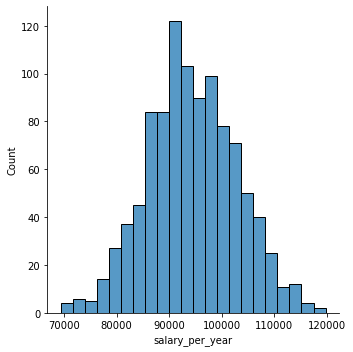

In [19]:
sns.displot(df["salary_per_year"]);

In [20]:
df.corr()

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked,salary_per_year
degree,1.000000,-0.000917,-0.049910,0.019694,0.009582,0.037955,0.056521,0.059452
masters,-0.000917,1.000000,-0.060261,0.041311,-0.039833,-0.023037,0.031770,0.188059
professional_membership,-0.049910,-0.060261,1.000000,-0.022102,0.013848,-0.022400,-0.061360,0.550464
years_experience,0.019694,0.041311,-0.022102,1.000000,-0.001964,0.004937,-0.046505,0.539229
audit_experience,0.009582,-0.039833,0.013848,-0.001964,1.000000,-0.052321,-0.024960,0.376497
IT_skill_rate,0.037955,-0.023037,-0.022400,0.004937,-0.052321,1.000000,-0.007045,0.185843
Size_of_the_company_worked,0.056521,0.031770,-0.061360,-0.046505,-0.024960,-0.007045,1.000000,0.029152
salary_per_year,0.059452,0.188059,0.550464,0.539229,0.376497,0.185843,0.029152,1.000000


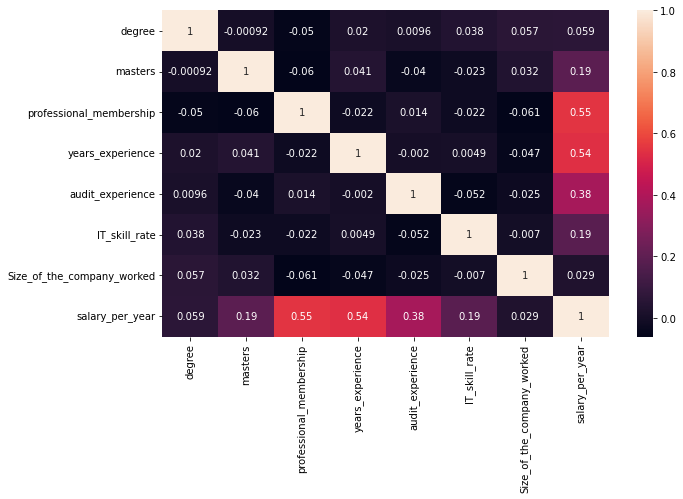

In [24]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True);


In [25]:
df.columns

Index(['degree', 'masters', 'professional_membership', 'years_experience',
       'audit_experience', 'IT_skill_rate', 'Size_of_the_company_worked',
       'salary_per_year'],
      dtype='object')

In [29]:
x = df.drop("salary_per_year", axis=1)
x

,degree,masters,professional_membership,years_experience,audit_experience,IT_skill_rate,Size_of_the_company_worked
0,1,1,0,4,3,9.6,4
1,1,1,1,9,4,3.6,3
2,1,0,0,13,2,6.9,2
3,1,1,1,2,3,8.9,1
4,1,2,1,13,5,7.5,4
...,...,...,...,...,...,...,...
1008,1,2,0,11,5,5.1,1
1009,1,2,0,4,0,9.1,1
1010,1,1,1,6,5,6.3,2
1011,1,1,1,13,5,6.6,1


In [31]:
y = df["salary_per_year"]
y.head()

0     89661
1    105336
2     91402
3     96137
4    113364
Name: salary_per_year, dtype: int64

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [35]:
len(df)

1013

In [37]:
len(X_train), len(X_test)

(678, 335)

##create Model



In [39]:
model = LinearRegression()

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
prediction = model.predict(X_test)

In [42]:
prediction

array([ 97624.82166637,  90888.64024244, 100550.96548128,  95001.54802934,
        95716.26965652,  88043.67294003,  98048.34689682,  99388.30213952,
        99131.01562773,  95648.0930036 , 103030.63978834, 104875.81512026,
        98224.0140496 ,  94127.00582185,  88388.3772683 , 105708.3719143 ,
        95641.828923  ,  97218.18198915,  97829.40578788,  95465.52429452,
        96429.30048465,  96063.24447103,  82585.92084436, 107159.21579014,
        99898.924843  ,  90922.78686994,  97962.93212172,  80972.35686033,
        92083.90250521,  99136.28966368,  97563.04577348,  83927.14698791,
        91154.77221564,  95972.52427384,  98326.94476735,  89273.50146118,
        94051.28059618,  90247.7124242 ,  99192.43490111,  86874.81696687,
        85854.40932666,  71293.81898064, 101130.25644863,  93414.95693724,
        87464.91307088,  98108.42659235, 108464.33715414,  98516.40584742,
        91749.9678769 ,  85967.8194393 ,  79230.68340742,  88393.58802556,
        80679.48391526,  

In [43]:
prediction[0]

97624.82166636703

In [44]:
y_test

689     93571
518     87150
940    105760
96      93330
578    102614
        ...  
79     104592
148     88503
302     73297
464    101318
712     77927
Name: salary_per_year, Length: 335, dtype: int64

In [45]:
np_y_test = np.array(y_test)

In [47]:
np_y_test[0] 

93571

#mean Absolute Error

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mean_absolute_error(y_test, prediction)

2754.2851254472116

In [50]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, prediction))

Mean Absolute Error:  2754.2851254472116


In [51]:
mean_squared_error(y_test, prediction)

10641378.16497348

In [53]:
print("Root mean square error : ", np.sqrt(mean_squared_error(y_test, prediction)))

Root mean square error :  3262.112531010155


In [57]:
ind = 5
np_y_test = np.array(y_test)
actual = np_y_test[ind]
pred = round(prediction[ind], 2)
diff = round(actual - pred, 2)
prec = round(diff/actual * 100, 2)
print("Actual : " + str(actual))
print("Prediction : " +  str(pred))
print("Error : " + str(diff))
print("Error % : " + str(prec))

Actual : 87982
Prediction : 88043.67
Error : -61.67
Error % : -0.07
